In [1]:
# Run this code if you get errors with missing requirements
import sys
!{sys.executable} -m pip install mysql-connector

import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)


In [2]:
# Check database contents
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE node_id = 54016 AND timestamp > '2019-04-28 09:00:00.000000+00:00' AND timestamp < '2019-04-29 09:05:08.078133+00:00' LIMIT 50000 " );
df = pd.DataFrame(mycursor.fetchall())

print(df)

       node_id                            timestamp    x     y  z   q
0        54016  b'2019-04-28 09:00:00.987718+00:00'  118  2596  0  61
1        54016    b'2019-04-28 09:00:01.9881+00:00'  130  2592  0  87
2        54016  b'2019-04-28 09:00:02.988524+00:00'  132  2588  0  59
3        54016   b'2019-04-28 09:00:03.98781+00:00'  143  2581  0  70
4        54016  b'2019-04-28 09:00:04.987782+00:00'  146  2578  0  63
...        ...                                  ...  ...   ... ..  ..
23116    54016  b'2019-04-29 09:05:03.987771+00:00'  102  2591  0  92
23117    54016  b'2019-04-29 09:05:04.988151+00:00'   98  2587  0  69
23118    54016  b'2019-04-29 09:05:05.987868+00:00'  107  2594  0  90
23119    54016  b'2019-04-29 09:05:06.987863+00:00'  105  2597  0  96
23120    54016  b'2019-04-29 09:05:07.987943+00:00'  111  2597  0  88

[23121 rows x 6 columns]


# Tehdään tuttuun tapaan uusi dataframe, siivotaan timestamp ynnämuut (katso Suosituimmatkarryt, karryjenruuhka-ajat)

In [3]:
# Dataframe johon saatu data
table = pd.DataFrame()
table['node'] = df.node_id
table['T']  = df.timestamp
table['X']  = df.x
table['Y']  = df.y
table['Z']  = df.z
table['Q']  = df.q
table['count'] = 0

# Siivotaan timestampista rojut
table['T'] = table['T'].astype(str)
table['T'].dtype
table['T'] = table['T'].str.slice(2, -7)


# Timestampit datetimeiksi
table['T'] = table['T'].astype('datetime64[ns]')
table['T'] = pd.Series(table['T']).dt.round("S")
table['T'].head()



0   2019-04-28 09:00:01
1   2019-04-28 09:00:02
2   2019-04-28 09:00:03
3   2019-04-28 09:00:04
4   2019-04-28 09:00:05
Name: T, dtype: datetime64[ns]

# Plotataan kuva

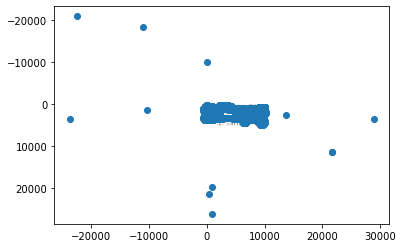

In [4]:
import pylab as plt

img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(table.X, table.Y, 'o')

# Suodatetaan rajoja

In [5]:
# Suodatetaan rajoja. Jotain samoja taijjettiin jo SQL haussa suodattaa
table = table[table.Y > -1]
table = table[table.Y < 10407]
table = table[table.Q < 120]
table = table[table.X < 10100]
table = table[table.X > 240]

# Latausasemat pois
table = table.drop(table[(table.X < 1850.0) & (table.Y > 3000)].index)
# Oikea ylänurkka pois
table = table.drop(table[(table.X > 8200) & (table.Y < 250)].index)
# tuloaula - ei vissiin toimi tracking siellä hyvin
table = table.drop(table[(table.X < 1000) & (table.Y > 2500)].index)
print(table)

        node                   T     X     Y  Z    Q  count
1218   54016 2019-04-28 09:19:10  1002  2873  0   63      0
1219   54016 2019-04-28 09:19:11  1101  2859  0   82      0
1220   54016 2019-04-28 09:19:12  1193  2857  0   78      0
1221   54016 2019-04-28 09:19:13  1288  2836  0   79      0
1222   54016 2019-04-28 09:19:14  1385  2828  0   73      0
...      ...                 ...   ...   ... ..  ...    ...
10488  54016 2019-04-29 05:39:17   371  1567  0  110      0
10489  54016 2019-04-29 05:39:18   339  1452  0  108      0
10493  54016 2019-04-29 05:39:24   251  1134  0   80      0
10495  54016 2019-04-29 05:39:26   241  1100  0   72      0
10501  54016 2019-04-29 05:39:32   575  2301  0   98      0

[5300 rows x 7 columns]


# Katsotaan kuvaa uudestaan

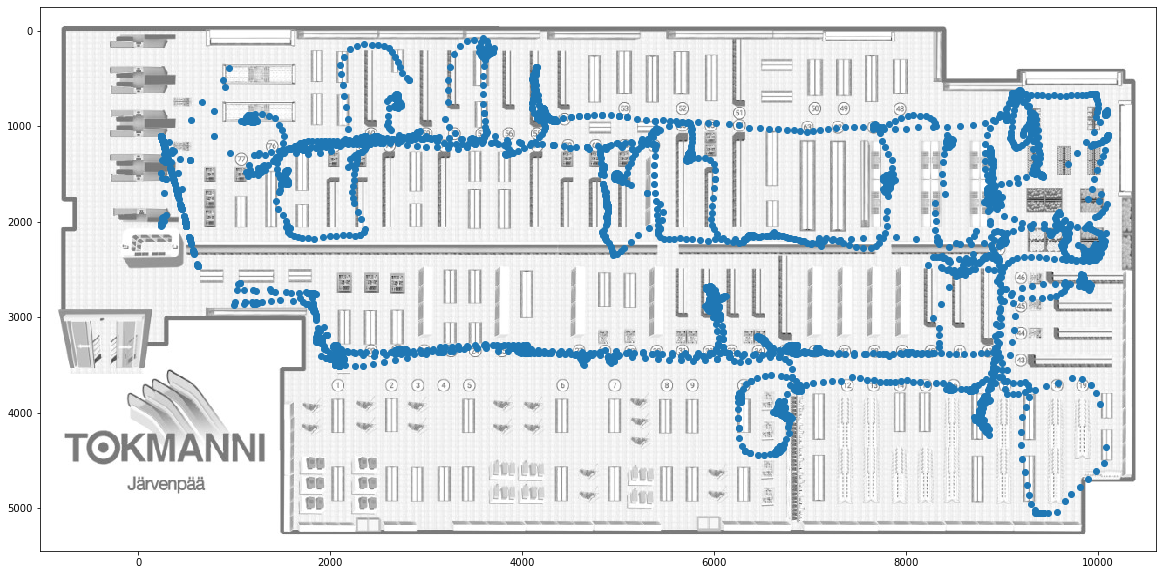

In [6]:

img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(table.X, table.Y, 'o')

# Poistetaan päivät joilta ei ole riittävästi dataa (TYÖN ALLA)

In [7]:
#table['date'] = table[]


In [8]:
#maara = datamaara(table['T'], table['X'])
#print(maara)


In [9]:
#maara = datamaara(table['T'], table['X'])
#print(maara[0])
#table = table[ > 500]
#print(table)

# Timestamppien erotus ajat. (Datan sekunttitarkkuus, heitot)

In [10]:
def dTime(t1, t2):
    
    # Aikojen erotus
    dtime = int((t2 - t1) * 10**-9)

    return dtime


dtimes = [] 

for i in range(len(table) - 1):   # index outofbounds koska i+1
    t1 = table['T'].values[i]
    t2 = table['T'].values[i+1]
    dtimes.append(dTime(t1, t2))
dtimes.append(dTime(t1, t2))

table['dTime'] = dtimes
print(table['dTime'])

1218     1
1219     1
1220     1
1221     1
1222     1
        ..
10488    1
10489    6
10493    2
10495    6
10501    6
Name: dTime, Length: 5300, dtype: int64


# Poistetaan yli 3s heitot datasta

In [11]:
table['dTime'].mean(axis = 0)
table = table[table['dTime'] < 3]
table['dTime'].mean(axis = 0)

0.9019528890678478

# Katsotaan miltä koordinaatit näyttävät kartalla

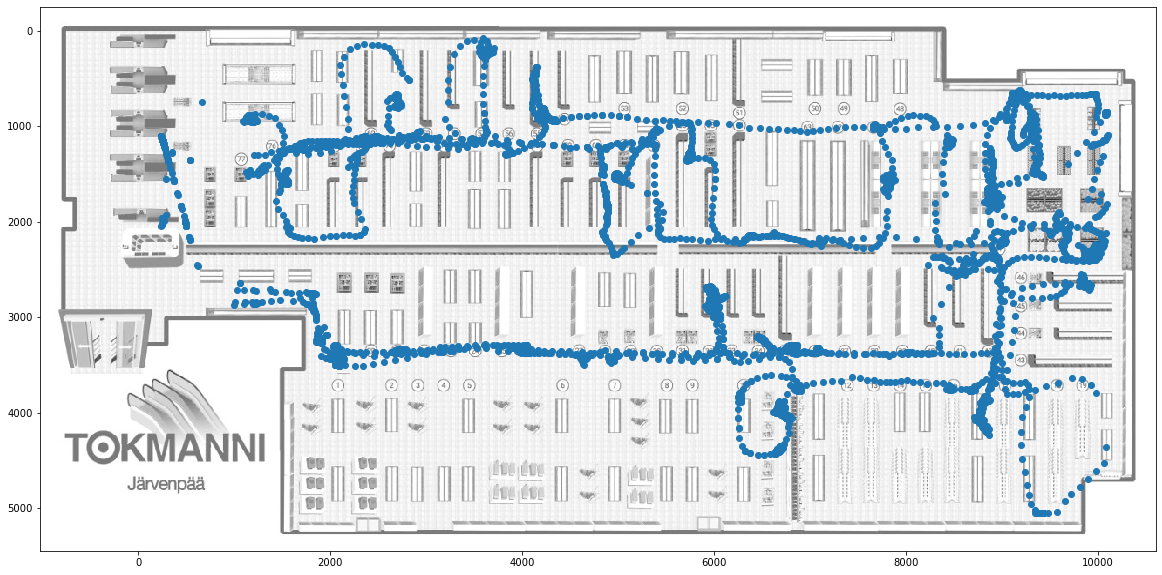

In [12]:


img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(table.X, table.Y, 'o')

# Lasketaan kahden vierekkäisen timestampin Delta x ja y, otetaan tähän suoraan aika mukaan jolloin saaadaan m/s
### Saatiin X ja Y koordinaattien muutokseksi about 86 = 1m


In [13]:
import math  
nopeus = []
matka = []
tempmatka = 0

# Neliöjuuri ( DX**2 + DY**2 ) saadaan vektorien etäisyys
# timestampit mukana nii nopeus.
def nopeudet(x1,y1,x2,y2, t1, t2):
    global tempmatka
    # käytetään aikaisempaa funktiota
    dtime = dTime(t1, t2)
   
    # Säästytään 0 jakamiselta

    if dtime == 0: 
        dtime = 1

    tempmatka = math.sqrt((x2 - x1)**2 + (y2 - y1)**2) / 86
    nopeus = tempmatka / dtime
    return nopeus

# Tässä nyt tapa laittaa arvot ensin listaan *metreina*
# Ehdota parempaa tapaa tehdä tämä.
for i in range(len(table) - 1):   # index outofbounds koska i+1
    x1 = table['X'].values[i]
    y1 = table['Y'].values[i]
    x2 = table['X'].values[i+1]
    y2 = table['Y'].values[i+1]
    t1 = table['T'].values[i]
    t2 = table['T'].values[i+1]
    nopeus.append(nopeudet(x1, y1, x2, y2, t1, t2))
    matka.append(tempmatka)
# Lisään viimeiseen FALSE arvo koska listojen pituus pitää olla sama.
nopeus.append(nopeudet(x1, y1, x2, y2, t1, t2))
matka.append(tempmatka)

# Tehdään dataframeen uusi taulu johon laitetaan listan tavarat
table["m/s"] = nopeus
table["matka"] = matka
print(table)

        node                   T     X     Y  Z    Q  count  dTime       m/s  \
1218   54016 2019-04-28 09:19:10  1002  2873  0   63      0      1  1.162616   
1219   54016 2019-04-28 09:19:11  1101  2859  0   82      0      1  1.070020   
1220   54016 2019-04-28 09:19:12  1193  2857  0   78      0      1  1.131318   
1221   54016 2019-04-28 09:19:13  1288  2836  0   79      0      1  1.131736   
1222   54016 2019-04-28 09:19:14  1385  2828  0   73      0      1  1.060437   
...      ...                 ...   ...   ... ..  ...    ...    ...       ...   
10347  54016 2019-04-29 05:08:22   252  1139  0  107      0      1  0.032260   
10359  54016 2019-04-29 05:09:38   309  1342  0   98      0      1  0.000692   
10472  54016 2019-04-29 05:37:49   336  1439  0  108      0      1  0.017534   
10488  54016 2019-04-29 05:39:17   371  1567  0  110      0      1  0.746380   
10493  54016 2019-04-29 05:39:24   251  1134  0   80      0      2  0.746380   

          matka  
1218   1.162616  
121

# Katsotaan onko suuria hyppyjä nopeuksissa sekä keskiarvo


0.3453496846559209

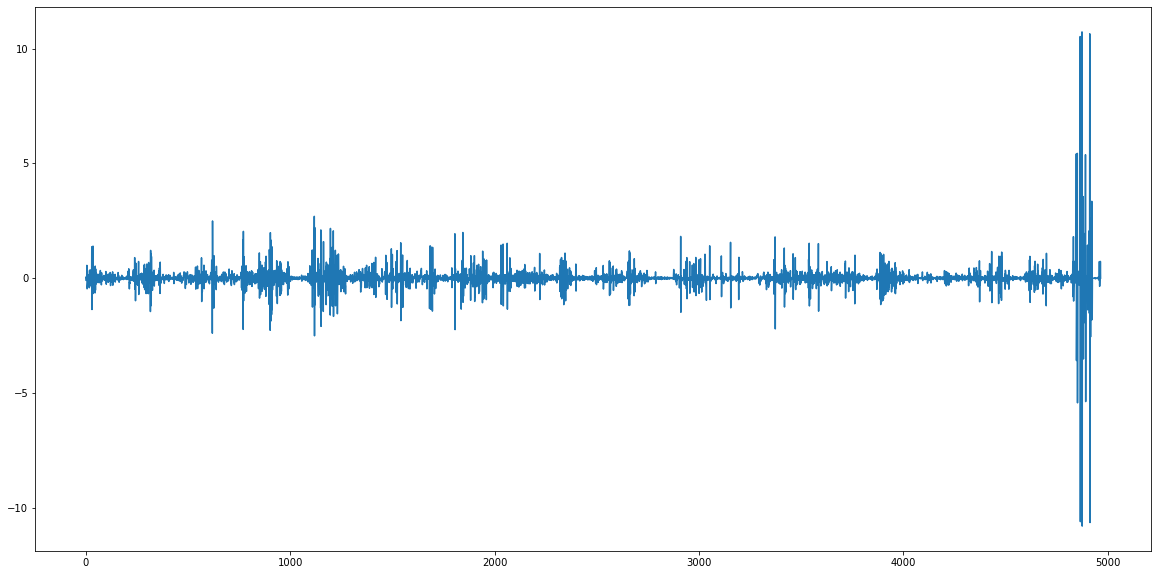

In [14]:
import numpy as np
plt.plot(np.diff(table['m/s']))
table['m/s'].mean(axis = 0)

# Otetaan kaikki yli 5m/s menevät kärrit pois.
### Laitetaan lisäksi km/h

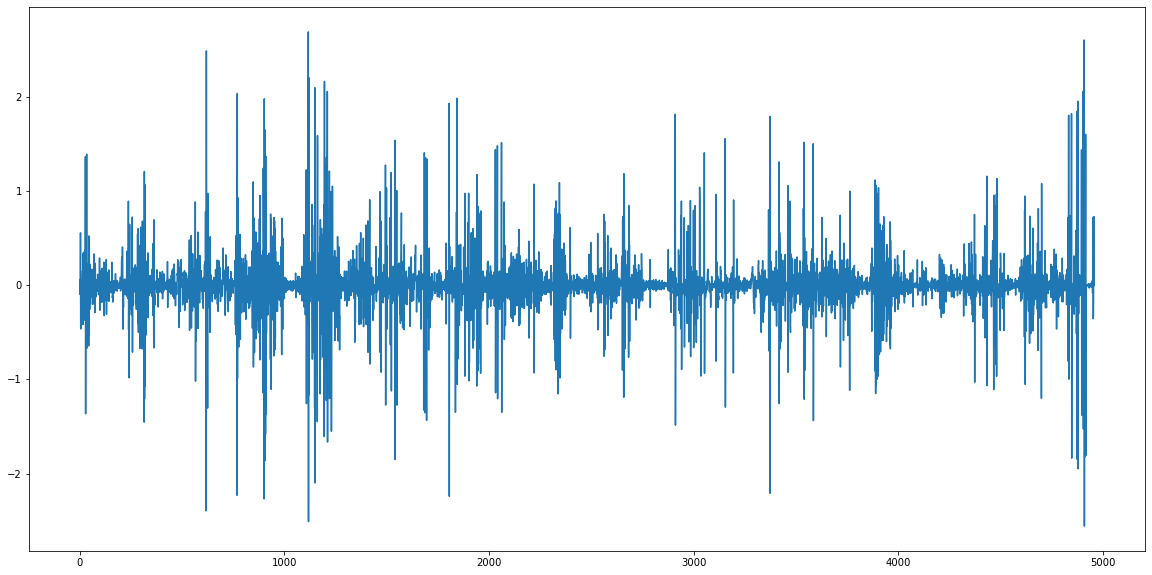

In [15]:
table = table[table['m/s'] < 3]
table['km/h'] = table['m/s'] * 3.6
plt.plot(np.diff(table['m/s']))

# Katsotaan onko suuria hyppyjä metrimäärissä sekä keskiarvo
### Ei pitäisi olla sillä ollaan leikattu nopeudesta jo pois

0.43280520209939116

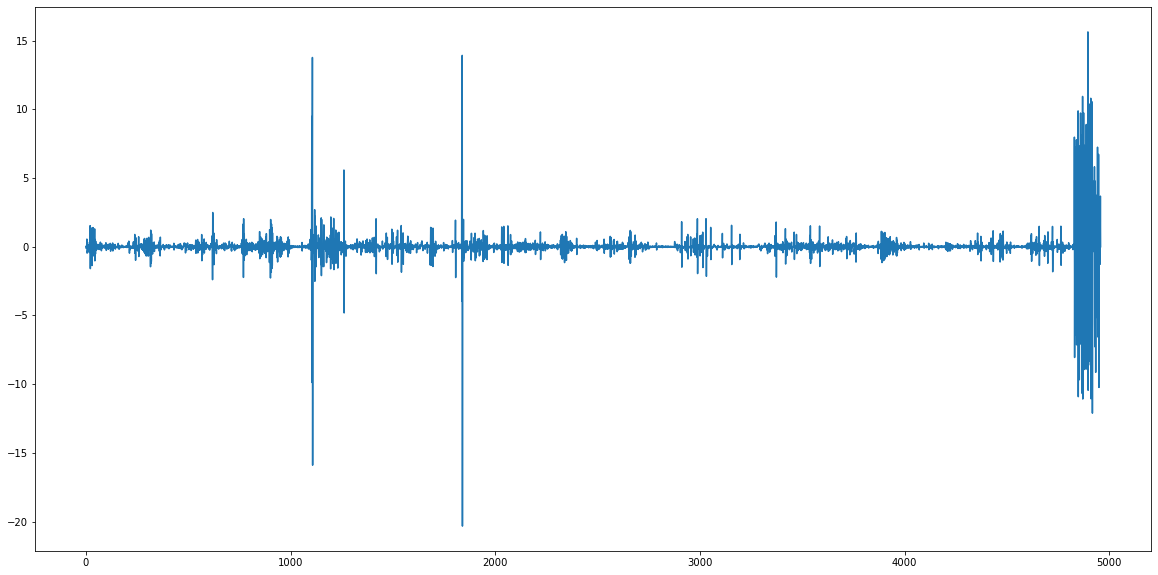

In [16]:
import numpy as np
plt.plot(np.diff(table['matka']))
table['matka'].mean(axis = 0)

# Otetaan kaikki yli 3m hypyt pois ja katsotaan tulos


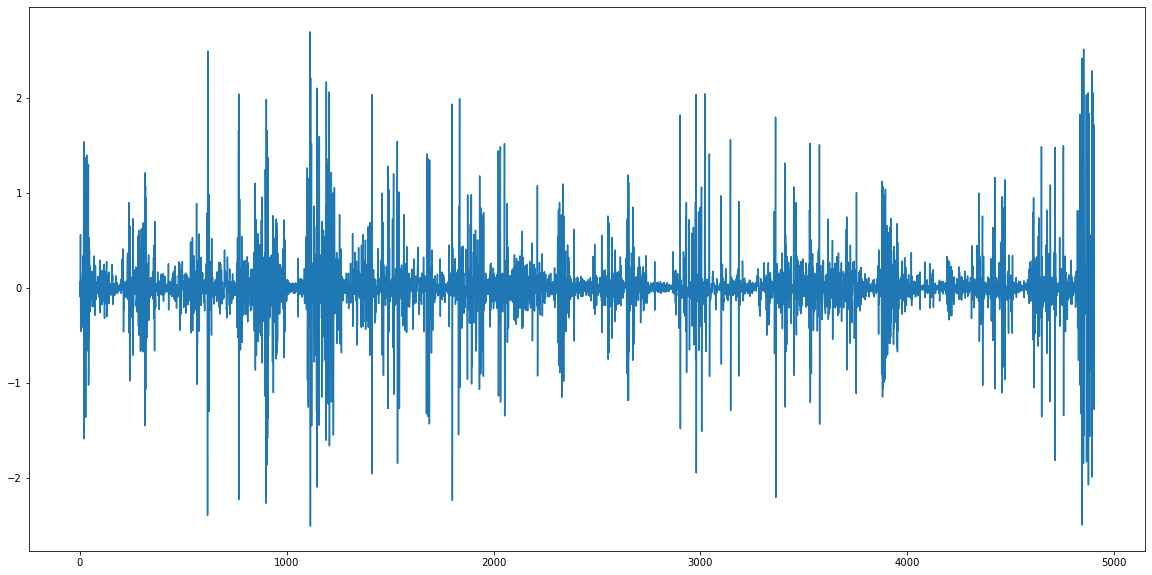

In [17]:
table = table[table['matka'] < 3]
plt.plot(np.diff(table['matka']))

# Plotataan kuva uudestaan

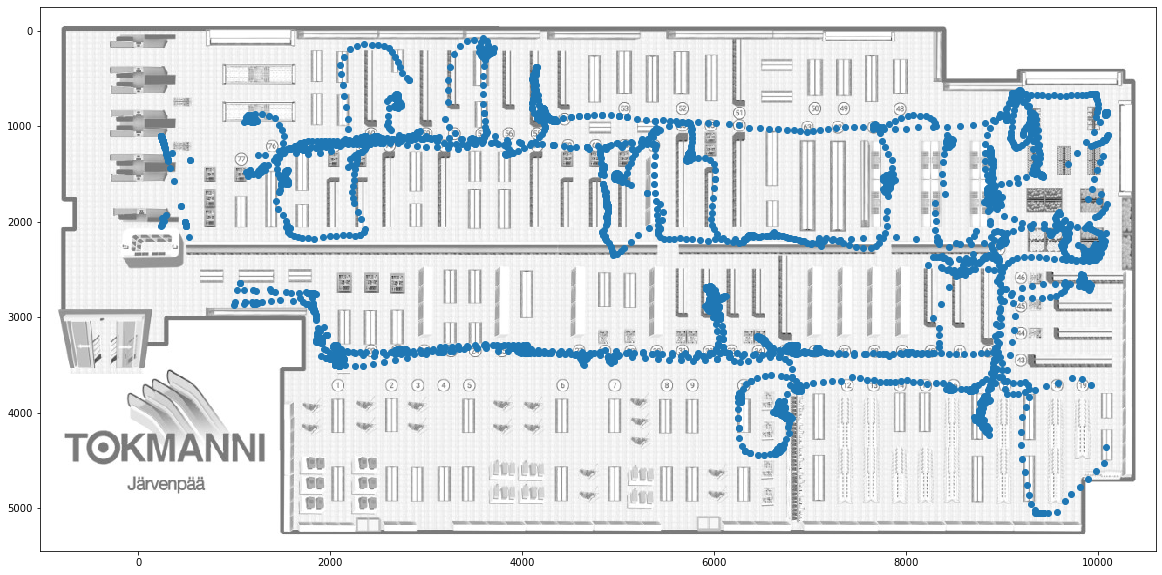

In [18]:
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(table.X, table.Y, 'o')

# TESTAUSTA. Paikat jossa kärry pysähtynyt yms.

In [19]:
pysahdyksissa = pd.DataFrame()
xlista = []
ylista = []

for i in range(len(table)):
    if (table['m/s'].values[i] == 0 and table['matka'].values[i] == 0):
        x = table['X'].values[i]
        y = table['Y'].values[i]
        xlista.append(x)
        ylista.append(y)
        
pysahdyksissa['x'] = xlista
pysahdyksissa['y'] = ylista

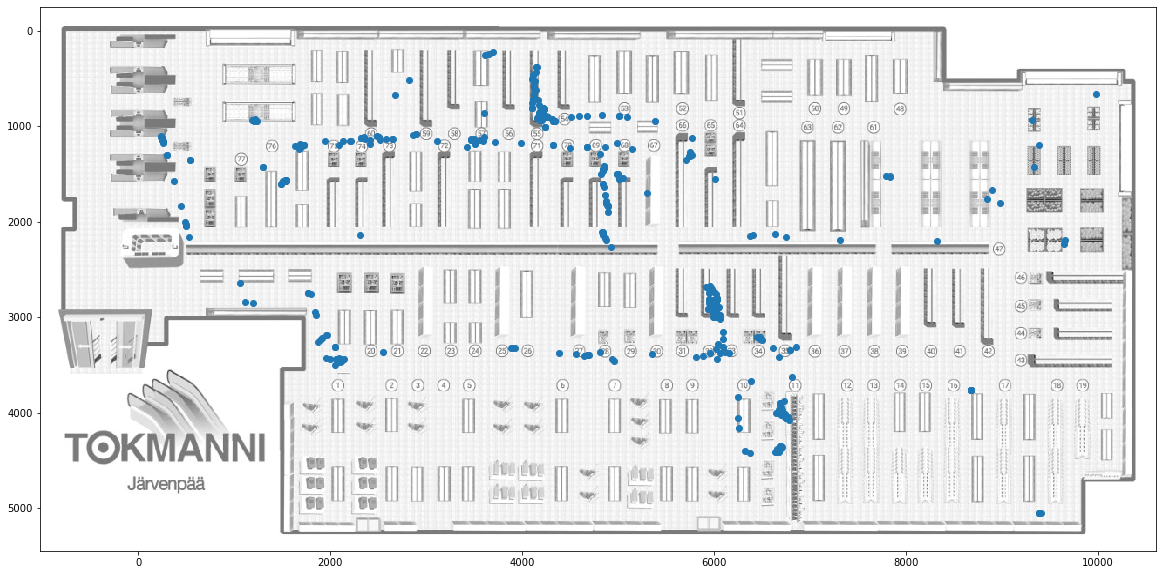

In [20]:
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]

plt.plot(pysahdyksissa.x, pysahdyksissa.y, 'o')

2019-04-28T09:49:49.000000000 9385 5050 0 0.0 0.0 83
2019-04-28T09:49:54.000000000 9380 5050 0 0.0 0.0 87
2019-04-28T09:49:58.000000000 9386 5050 0 0.0 0.0 79
2019-04-28T09:50:00.000000000 9384 5050 0 0.0 0.0 99
2019-04-28T09:50:22.000000000 9402 5050 0 0.0 0.0 85
